# CNN for CIFAR-10 dataset and LeNet-5 architectur

## Load CIFAR-10 dataset

In [12]:
# 1) Load and normalize CIFAR10
# https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import matplotlib.pyplot as plt
import numpy as np

import importlib
import data
importlib.reload(data)
from data import show_first_images, get_cifar10_loaders, CLASSES

import torch
from config import BATCH_SIZE, LR, EPOCHS, WEIGHT_DECAY
from data import get_cifar10_loaders
from models.lenet import LeNet5_CIFAR10
from train_eval import train_model

In [9]:
# get some random training images
# https://github.com/pravalikaarunkumar/Comprehensive-CNN-Study-on-CIFAR10/blob/main/cnn_variants.ipynb
# Ausgabe der ersten Bilder des Datasets
# https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

# Downloading the data

get_cifar10_loaders()


100.0%


(<torch.utils.data.dataloader.DataLoader at 0x1b99de2fb60>,
 Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ))

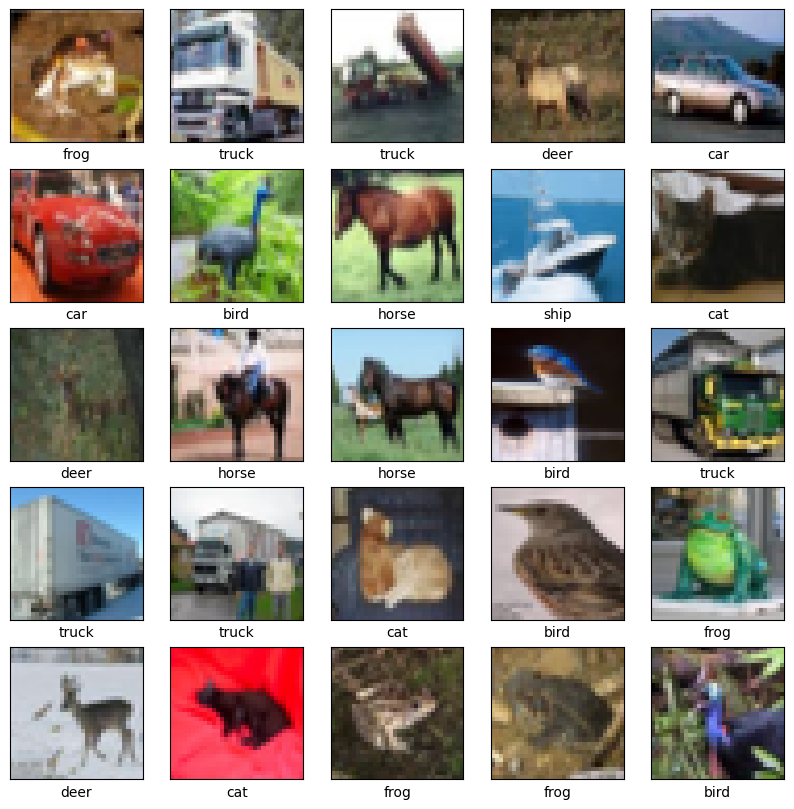

In [7]:
trainloader, testloader, trainset, testset = get_cifar10_loaders()
show_first_images(trainset, CLASSES, n=25)

In [ ]:
# LeNet trainieren

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

trainloader, testloader, _, _ = get_cifar10_loaders(batch_size=BATCH_SIZE)

model = LeNet5_CIFAR10().to(device)

history = train_model(
    model,
    trainloader,
    testloader,
    device,
    epochs=10,     # erstmal 10
    lr=LR,
    weight_decay=WEIGHT_DECAY,
)

### Building the CNN

https://medium.com/@myringoleMLGOD/simple-convolutional-neural-network-cnn-for-dummies-in-pytorch-a-step-by-step-guide-6f4109f6df80

https://github.com/lychengrex/LeNet-5-Implementation-Using-Pytorch/blob/master/LeNet-5%20Implementation%20Using%20Pytorch.ipynb

Code: https://www.digitalocean.com/community/tutorials/writing-lenet5-from-scratch-in-python <br>
https://www.youtube.com/watch?v=fcOW-Zyb5Bo

orig. paper: http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

Faltungsneuronale Netze von Grund auf
https://www.youtube.com/watch?v=jDe5BAsT2-Y

LeNet-5 explained: https://www.youtube.com/watch?v=lEBFpI7bqw0

In [3]:
# LeNet architecture
# 1x32x32 Input <- (5x5), s=1, p=0 -> avg pool s=2, p=0 -> (5x5), s=1,p=0 -> avg pool s=2 P=0
# -> Conv 5x5 to 120 channels x Linear 84 x Linear 10

# Defining the cnn

#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.layer1 = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
        nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out


# Before training hyperparameters neet to be set

model = LeNet5(num_classes).to(device)
    
#Setting the loss function
cost = nn.CrossEntropyLoss()
    
#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
#this is defined to print how many steps are remaining when training
total_step = len(train_loader)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
            
        #Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)
        #Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))


        # Test the model
# In the test phase, we don't need to compute gradients (for memory efficiency)

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f} %')

    

NameError: name 'nn' is not defined

In [ ]:
# https://www.youtube.com/watch?v=fcOW-Zyb5Bo
# https://github.com/AbXD8901/Comparison-of-CNN-Architectures-on-Different-Datasets/blob/main/LeNet-5.py

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size(2,2), stride(2,2))
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))  # number_expamples x 120 x 1 x 1 --> num_examples x 120
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x



        